C:\Users\mugil\AppData\Local\Temp\ipykernel_25364\3463640693.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_min = float(returns.T @ Wmin.reshape(-1, 1))
C:\Users\mugil\AppData\Local\Temp\ipykernel_25364\3463640693.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_max = float(max(returns))
C:\Users\mugil\AppData\Local\Temp\ipykernel_25364\3463640693.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a1 = float(O @ iC @ O.T)
C:\Users\mugil\AppData\Loca

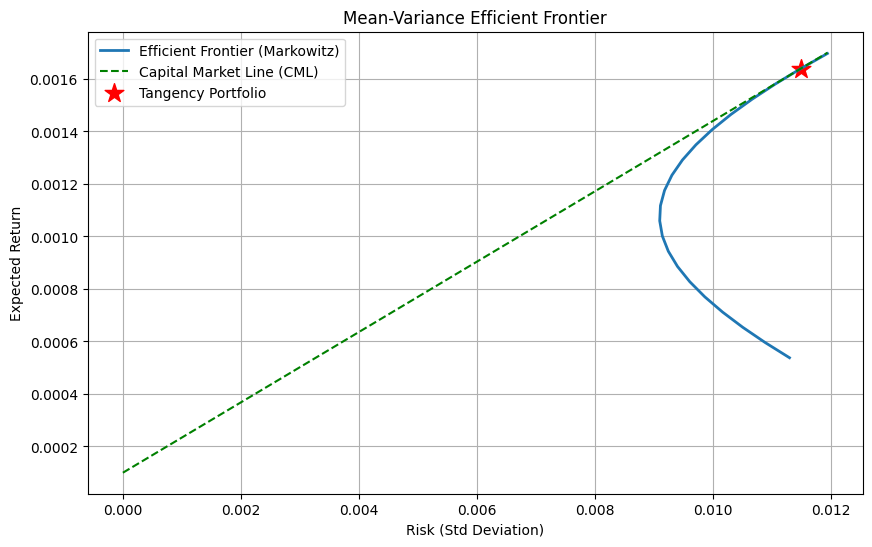

Tangency Portfolio Weights:
Airtel: 59.82%
Vodafone: -10.78%
Bharat: 8.45%
IOC: 10.11%
JSW: 0.81%
Tata Steel: -5.60%
SBI: 4.98%
HDFC: -2.22%
Eicher: 5.66%
Mahindra: 28.75%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("proj_data.xlsx")
df.columns = [
    'Airtel', 'Vodafone', 'Bharat', 'IOC', 'JSW',
    'Tata Steel', 'SBI', 'HDFC', 'Eicher', 'Mahindra'
]

returns = df.mean().values.reshape(-1, 1)     
C = df.cov().values                           
iC = np.linalg.inv(C)                         
O = np.ones((1, len(returns)))                
n = len(returns)

Wmin = (O @ iC) / (O @ iC @ O.T)              
Wmin = Wmin.flatten()
u_min = float(returns.T @ Wmin.reshape(-1, 1))
var_min = float(Wmin @ C @ Wmin.T)
std_min = np.sqrt(var_min)

#Efficient Frontier
u_max = float(max(returns))                   
t = 0.05
itr = int(1 / t) + 1
u = np.zeros(itr)
init = u_min * 0.5                            
for i in range(itr):
    u[i] = init
    init += (u_max - u_min * 0.5) * t


a1 = float(O @ iC @ O.T)
a2 = float(returns.T @ iC @ O.T)
b1 = float(O @ iC @ returns)
b2 = float(returns.T @ iC @ returns)
delta = a1 * b2 - a2 * b1

# Optimal weights and variance for each u
Wm = np.zeros((itr, n))
var = np.zeros(itr)

for i in range(itr):
    lam = (b2 - u[i]*b1) / delta
    gam = (a1*u[i] - a2) / delta
    Wm[i, :] = (lam * (iC @ O.T) + gam * (iC @ returns)).flatten()
    var[i] = Wm[i, :] @ C @ Wm[i, :].T

plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(var), u, linewidth=2, label='Efficient Frontier (Markowitz)')
plt.xlabel('Risk (Std Deviation)')
plt.ylabel('Expected Return')
plt.title('Mean-Variance Efficient Frontier')
plt.grid(True)
plt.legend()

# Capital Market Line (CML)
# Tangency portfolio (Max Sharpe)
rf = 0.0001  # daily risk-free rate
sharpe_ratios = (u - rf) / np.sqrt(var)
max_sharpe_idx = np.argmax(sharpe_ratios)
slope = sharpe_ratios[max_sharpe_idx]
x = np.linspace(0, max(np.sqrt(var)), 100)
cml = rf + slope * x

plt.plot(x, cml, linestyle='--', color='green', label='Capital Market Line (CML)')
plt.scatter(np.sqrt(var[max_sharpe_idx]), u[max_sharpe_idx], color='red', marker='*', s=200, label='Tangency Portfolio')
plt.legend()
plt.show()

# Print tangency portfolio weights
print("Tangency Portfolio Weights:")
for name, weight in zip(df.columns, Wm[max_sharpe_idx]):
    print(f"{name}: {weight:.2%}")
